In [480]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import math

# To ignore all warnings (not recommended in most cases)
warnings.filterwarnings('ignore')


In [481]:
# Load the training and testing dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [482]:
#check the shape of the data
print(df_train.shape)
print(df_test.shape)


(1460, 81)
(1459, 80)


In [483]:
#check the description of the data (only summary statistics for numerical features here)
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [484]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [485]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [486]:
#closer look to target variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

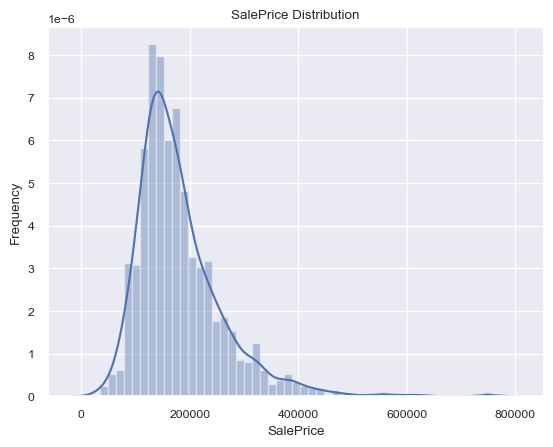

In [487]:
# visualize the distribution of SalePrice using histogram:
sns.distplot(df_train['SalePrice'])
# add title and labels
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


First thing we notice is that the mean > median (50%), suggesting that the distribution is right-skewed. Also, we see that we have outliers on the higher end (high saleprice range). 

## 2: Give 3 examples of continuous and categorical features in the dataset; choose one feature of each type and plot the histogram to illustrate the distribution:

Examples of continuous features: LotArea, LotFrontage, MasVnrArea;

Examples of categorical features: MasVnrType, RoofStyle, CentralAir.

For the continuous feature, I plot the histogram of "LotArea":
From the plot we can see that there are some outliers on the right side with very huge sizes. 

For the categorical feature, I plot the histogram of "MasVnrType":
We can see that there are four categories for this feature.

In [488]:
#identify the categorical and numerical features:

#list of numerical features
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)
print('Number of numerical features:', len(numerical_features))

#list of categorical features
categorical_features = df_train.select_dtypes(include=['object']).columns
print(categorical_features)
print('Number of categorical features:', len(categorical_features))


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Number of numerical features: 38
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'B

[Text(0.5, 1.0, 'Histogram of LotArea')]

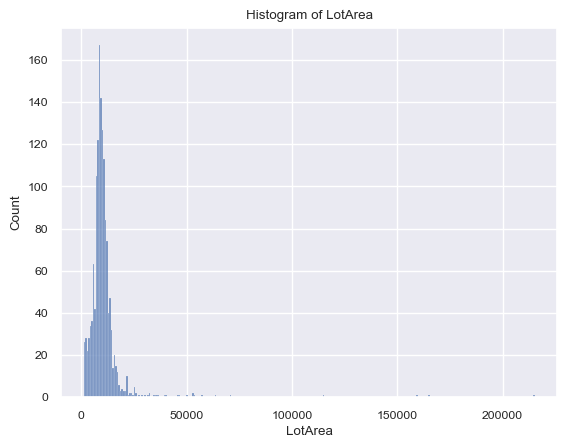

In [489]:
# plot the histogram of the continuous feature: LotArea
sns.histplot(df_train['LotArea']).set(title='Histogram of LotArea')

[Text(0.5, 1.0, 'Histogram of MasVnrType')]

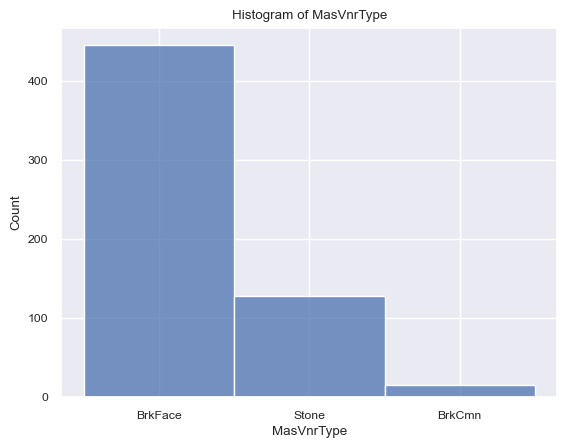

In [490]:
# plot the histogram of the categorical feature: MasVnrType
sns.histplot(df_train['MasVnrType']).set(title='Histogram of MasVnrType')

## 3. Preprocessing:

Pre-process your data, explain your pre-processing steps, and the reasons why you need them.
(Hint: data pre-processing steps can include but are not restricted to: dealing with missing values, normalizing numerical values, dealing with categorical values etc.)

### 3.1 Dealing with missing values:

The first step of preprocessing is dealing with missing values, since they can lead to errors during model training and reduce predictive accuracy. They can also introduce bias if not handled properly. So I first identify missing values in the dataset and decide how to handle them: remove columns with more than 50% of missing values; fill missing values with imputed values (i.e. replacing with mode for categorical features, using mean for numerical features). 

In [491]:
# dealing with missing values:
# check the number of missing values in each column, sorted in descending order
df_train.isnull().sum().sort_values(ascending=False)


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [492]:
#compute the percentage of missing values in each column
df_train.isnull().mean().sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [493]:
#list the columns with more than 50% missing values
missing_cols = df_train.columns[df_train.isnull().mean() > 0.5]
print(missing_cols)

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [494]:
#drop the columns with more than 50% missing values for both training and testing dataset
df_train = df_train.drop(columns=missing_cols)
df_test = df_test.drop(columns=missing_cols)

In [495]:
#check the shape of the data
print(df_train.shape)
print(df_test.shape)

(1460, 76)
(1459, 75)


In [496]:
# fill missing values with imputed values (i.e. replacing with mode for categorical features, using mean for numerical features). 
# Note that we only use the training data to compute the imputed values, and then apply the imputed values to both training and testing data.


for col in df_test.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
        df_test[col] = df_test[col].fillna(df_train[col].mode()[0])
    else:
        df_train[col] = df_train[col].fillna(df_train[col].mean())
        df_test[col] = df_test[col].fillna(df_train[col].mean())

#check if there is any missing values left
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())


0
0


In [497]:
#check the description of the data (only summary statistics for numerical features here)
df_train.describe()

#check the description of the data (only summary statistics for numerical features here)
df_test.describe()

#check the description of the data (only summary statistics for categorical features here)
df_train.describe(include=['object'])

#check the description of the data (only summary statistics for categorical features here)
df_test.describe(include=['object'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,...,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
unique,5,2,4,4,1,5,3,25,9,5,...,4,7,5,6,3,4,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1118,1453,934,1311,1459,1081,1396,218,1251,1444,...,758,1359,1094,929,703,1371,1406,1301,1259,1204


## Dataset checking:

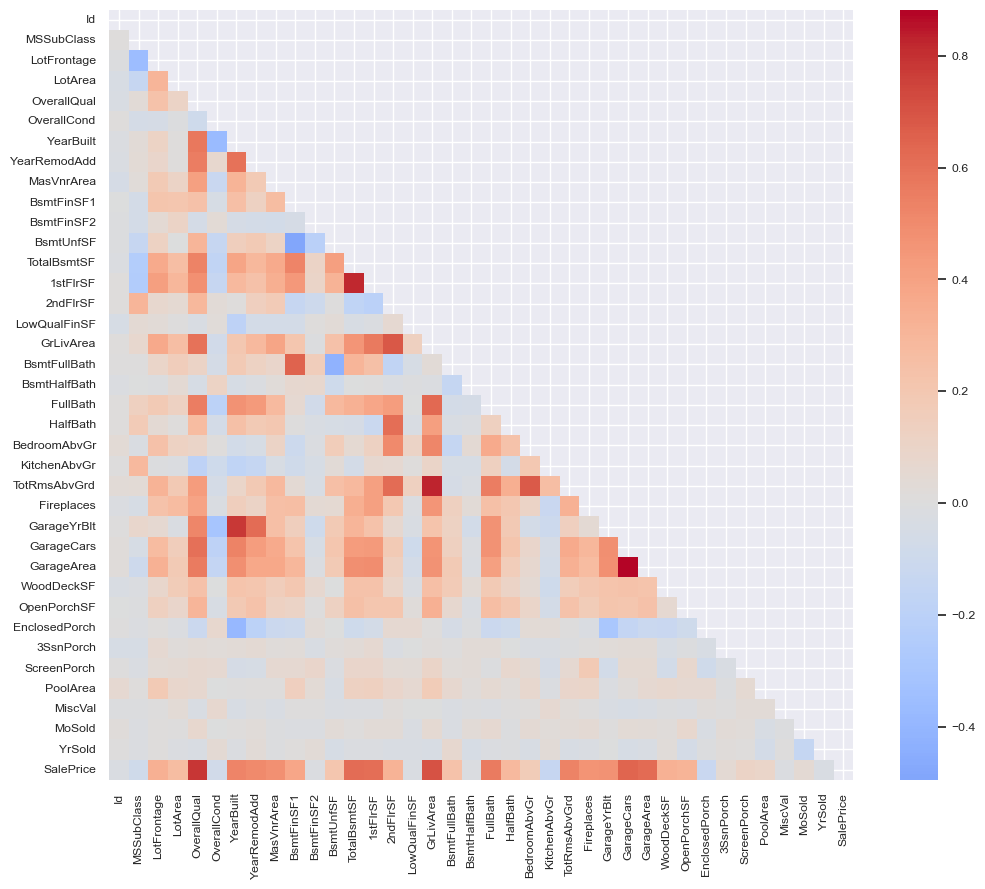

In [498]:
# Select the numerical columns in the DataFrame
numerical_columns = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numerical_columns.corr()
# Create a mask for the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, mask=mask)
plt.show()

We see a couple of very dark squares, indictang a high correlation between two variables. For instance,  OverallQual vs SalePrice (suggesting that OverallQual is an important feature for predicting SalePrice).

Another is GarageYrBlt vs YearBuilt, no surprise here given what those represent.

Then I pull top 10 most correlated pairs to spare ourselves from matching them on the plot. Note that we won't care about negatively correlated ones - there do not seem to be strongly negatively correlated features anyway.

In [499]:
# Compute pairwise correlation of columns, and stack it for easy filtering and sorting
corr = numerical_columns.corr().stack().reset_index()

# Give names to the correlation DataFrame columns
corr.columns = ['Variable 1', 'Variable 2', 'Correlation Coefficient']

# Sort each pair of variables
corr[['Variable 1', 'Variable 2']] = np.sort(corr[['Variable 1', 'Variable 2']], axis=1)

# Drop duplicate pairs and self-correlations
sorted_corr = corr[corr['Variable 1'] != corr['Variable 2']].drop_duplicates().sort_values(by='Correlation Coefficient', ascending=False)

# Display the top 10 positively cross-correlated feature pairs
print("Top 10 Positively Cross-Correlated Features:\n")
print(sorted_corr.head(10))

Top 10 Positively Cross-Correlated Features:

        Variable 1    Variable 2  Correlation Coefficient
1015    GarageArea    GarageCars                 0.882475
631      GrLivArea  TotRmsAbvGrd                 0.825489
469       1stFlrSF   TotalBsmtSF                 0.819530
189    OverallQual     SalePrice                 0.790982
253    GarageYrBlt     YearBuilt                 0.780555
645      GrLivArea     SalePrice                 0.708624
548       2ndFlrSF     GrLivArea                 0.687501
821   BedroomAbvGr  TotRmsAbvGrd                 0.676620
359     BsmtFinSF1  BsmtFullBath                 0.649212
1025    GarageCars     SalePrice                 0.640409


For these highly correlated pairs, there are two types: Feature-Feature Correlations, and Feature-Target Correlations. 

Feature-Feature Correlations: These correlations help identify how features within the dataset are related to each other. If two features are highly correlated, I might consider keeping one and removing the other to reduce multicollinearity.

Feature-Target Correlations: These correlations measure the strength and direction of the relationship between individual features and the target variable. This is very useful for feature selection: Features with strong positive correlations to the target variable are often considered important predictors.


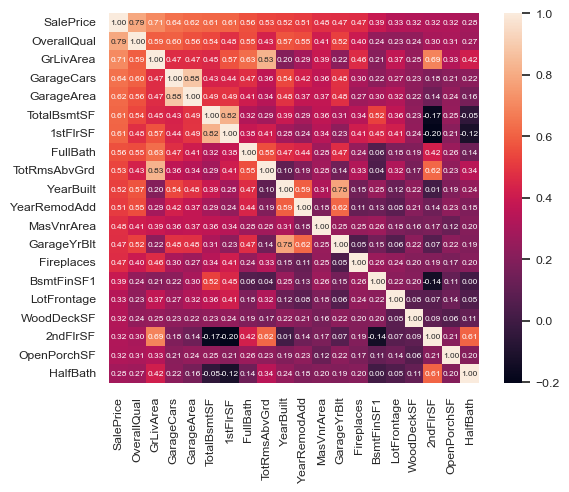

In [500]:
# top 20 numerical variables in the heatmap with the highest correlation with SalePrice:

corr_matrix = numerical_columns.corr()
n = 20
cols = corr_matrix.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [501]:
# get the list of top 20 numerical variables in the heatmap with the highest correlation with SalePrice:
top_20_corr = list(corr_matrix.nlargest(n, 'SalePrice')['SalePrice'].index)
print(top_20_corr)

#remove some of the variables that are highly correlated with each other:
top_20_corr.remove('GarageArea')
top_20_corr.remove('1stFlrSF')
top_20_corr.remove('TotRmsAbvGrd')
top_20_corr.remove('GarageYrBlt')
top_20_corr.remove('2ndFlrSF')

top_15_num=top_20_corr

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath']


Some thoughts and observations:

GarageArea and GarageCars are obviously very much related and we will only keep the GarageCars feature. Also, categorical variable are generally easier to deal with especially for decision trees.

GarageYrBlt and YearBuilt are most likely the same unless garage has been added later, which certainly does happen but we expect this to be quite rare. We will only keep YearBuilt feature.

GrLivArea stands for "Above grade (ground) living area square feet" and TotRmsAbvGrd is "Total rooms above grade (does not include bathrooms)". Again, quite naturally correlated, so we'll keep a more robust measure - the GrLivArea.

1stFlrSF and TotalBsmtSF - not surprising again that the first floor area is not too far off from the basement area.

OverallQual and GrLivArea are strongly correlated with our target feature - the SalePrice.

Multicollinearity is quite apparent, so the suggestions to remove some of the features mentioned above are indeed a good idea. So that we will have remaining OverallQual, GrLivArea, GarageCars and TotalBsmtSF all having correlation 0.6+ with SalePrice.

### Categorical features：


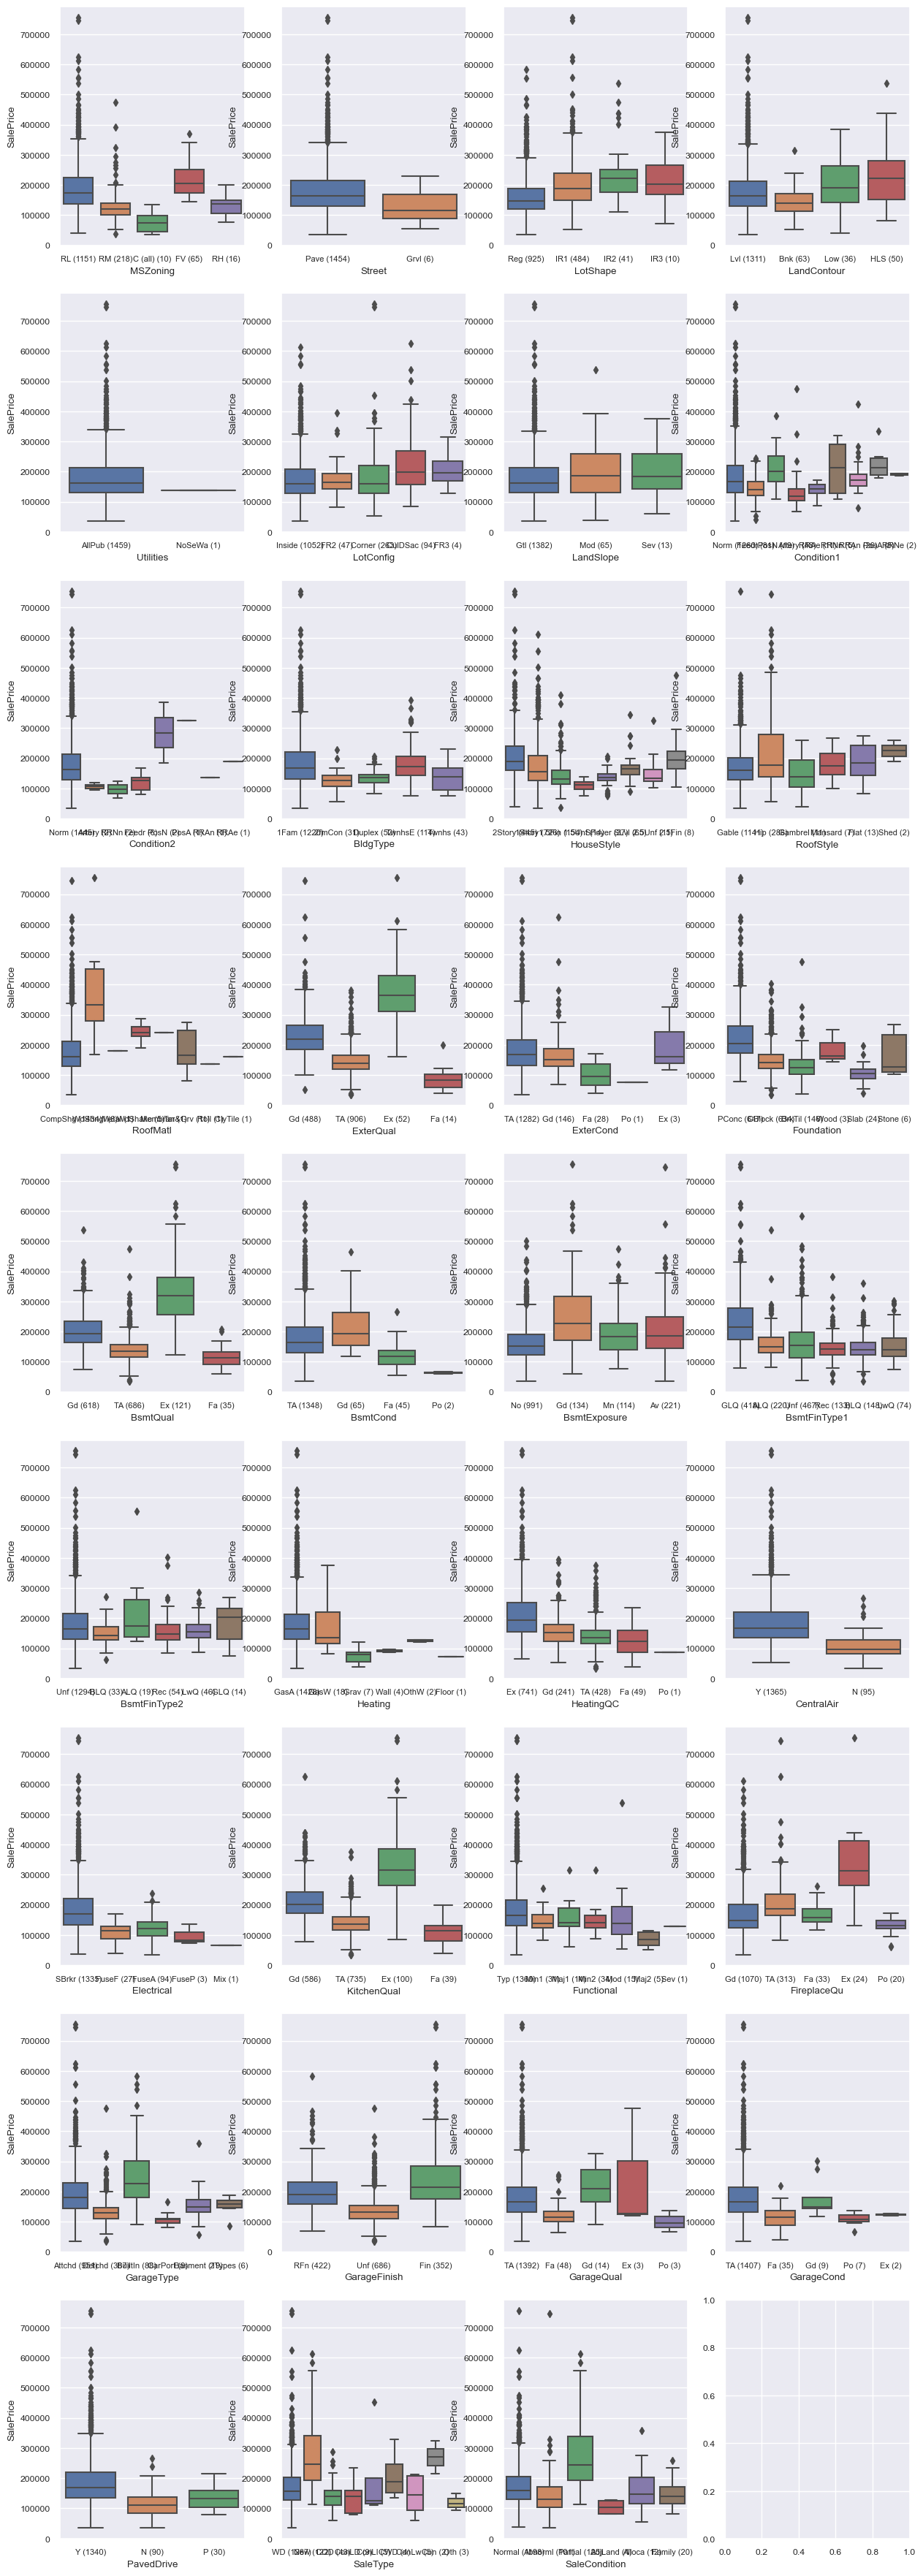

In [502]:
# get all categorical features
categorical_features = df_train.select_dtypes(include=['object']).columns

# Defining the number of rows and columns for subplot grid 
# Remove 4 from the total because we are plotting them separately due to labels not fitting
n_rows = math.ceil(len(categorical_features) / 4) - 1
n_cols = 4


# Create the subplot grid and figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# List of columns to plot separately
cols_to_plot_separately = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

# Plotting grid subplots
i = 0
for cat_col in categorical_features:
    if cat_col not in cols_to_plot_separately:
        row = i // n_cols
        col = i % n_cols
        sns.boxplot(x=df_train[cat_col], y=df_train['SalePrice'], ax=axes[row, col])
        labels = ['{} ({})'.format(label, df_train[cat_col].tolist().count(label)) for label in df_train[cat_col].unique()]
        axes[row, col].set_xticklabels(labels[:len(axes[row, col].get_xticks())], fontsize=8)
        i += 1

plt.show()



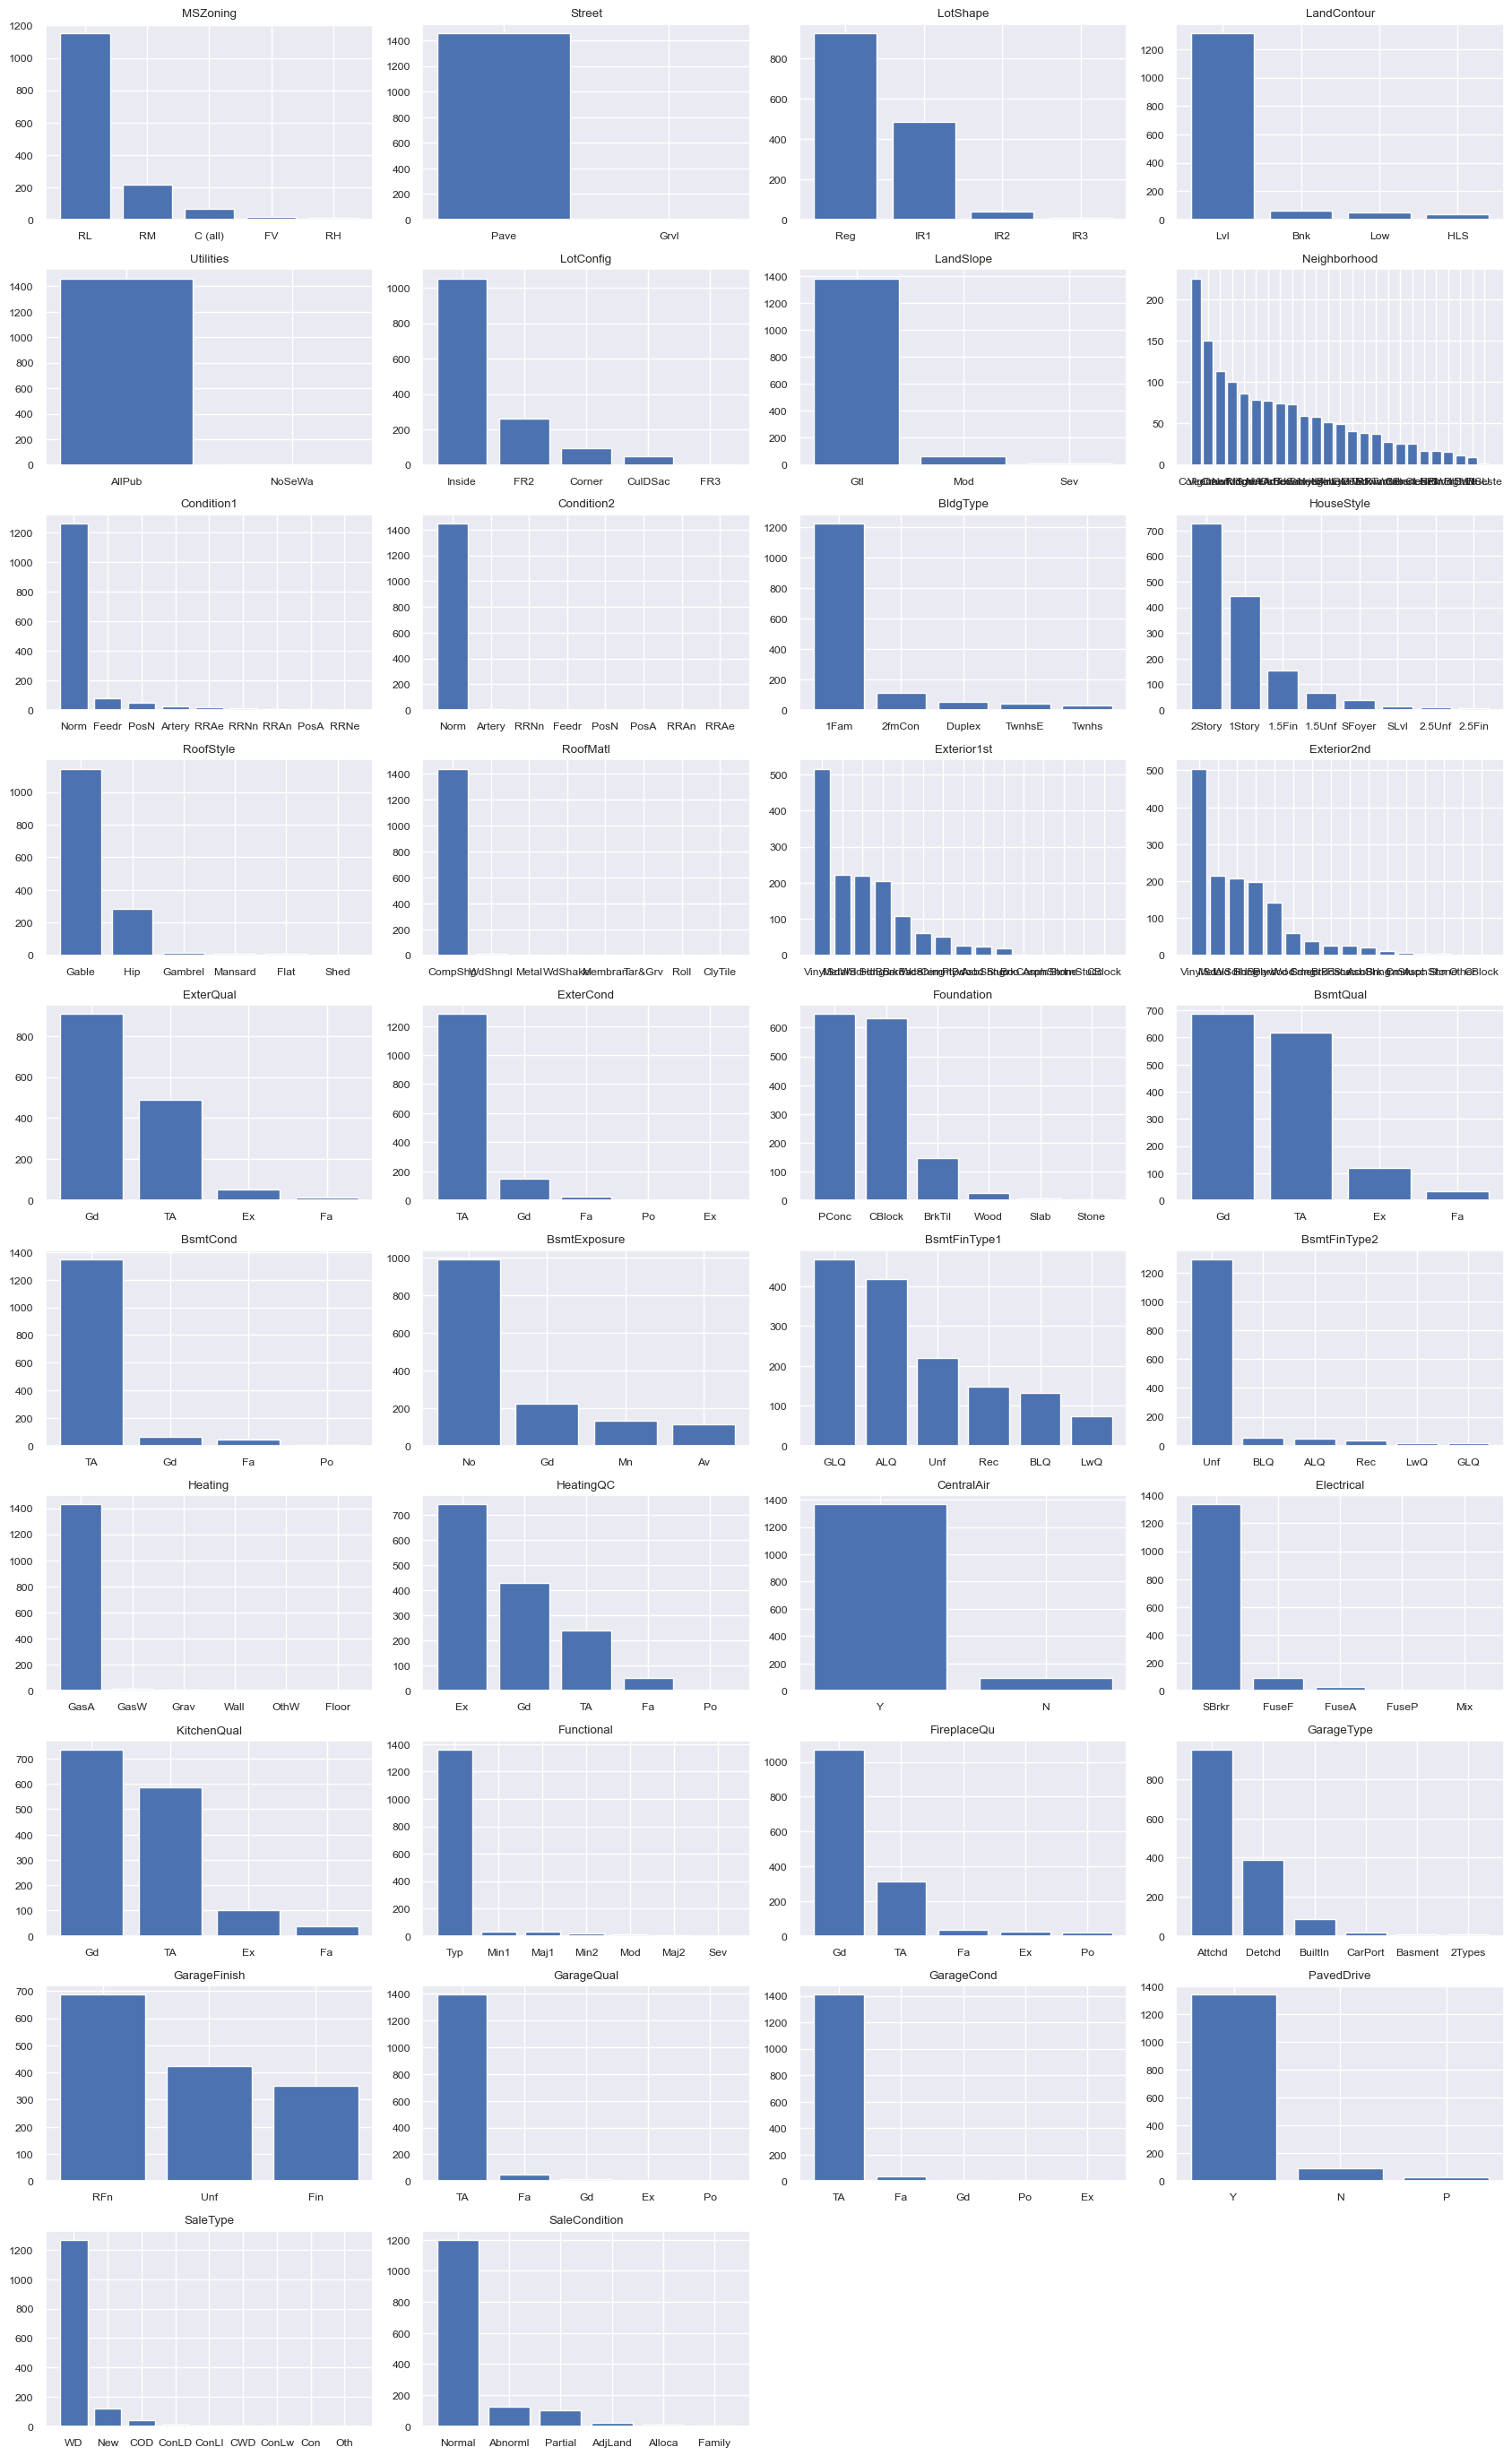

In [503]:

plt.figure(figsize=(17,30))
x=1
for feature in categorical_features:
    plt.subplot(11,4,x)
    plt.title(feature)
    plt.bar(df_train[feature].unique(),df_train[feature].value_counts())
    x = x + 1
   
plt.tight_layout()



Based on this plots, we further consider dropping categorical features that are highly skewed. 
 

We then remove significant features with multicollinearity as well as the Id column which does not provide any insights .

## Encoding categorical features

In [504]:
#remove saleprice from the list of top 15 numerical features:
top_15_num.remove('SalePrice')

# keep only the features in top_15_num and ['BsmtQual', 'FireplaceQu', 'PoolQC']
df_train = df_train[top_15_num + ['BsmtQual', 'FireplaceQu'] + ['SalePrice']]
df_test = df_test[top_15_num + ['BsmtQual', 'FireplaceQu']]
print(df_train.shape)
print(df_test.shape)

(1460, 17)
(1459, 16)


In [505]:
df_train

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,HalfBath,BsmtQual,FireplaceQu,SalePrice
0,7,1710,2,856,2,2003,2003,196.0,0,706,65.0,0,61,1,Gd,Gd,208500
1,6,1262,2,1262,2,1976,1976,0.0,1,978,80.0,298,0,0,Gd,TA,181500
2,7,1786,2,920,2,2001,2002,162.0,1,486,68.0,0,42,1,Gd,TA,223500
3,7,1717,3,756,1,1915,1970,0.0,1,216,60.0,0,35,0,TA,Gd,140000
4,8,2198,3,1145,2,2000,2000,350.0,1,655,84.0,192,84,1,Gd,TA,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,2000,0.0,1,0,62.0,0,40,1,Gd,TA,175000
1456,6,2073,2,1542,2,1978,1988,119.0,2,790,85.0,349,0,0,Gd,TA,210000
1457,7,2340,1,1152,2,1941,2006,0.0,2,275,66.0,0,60,0,TA,Gd,266500
1458,5,1078,1,1078,1,1950,1996,0.0,0,49,68.0,366,0,0,TA,Gd,142125


In [ ]:

pd.DataFrame(df.skew(),columns=["Skew"]).sort_values(by="Skew")


TypeError: could not convert string to float: 'RL'

In [ ]:
# correlations between the target variable "SalePrice" and all other numerical features 
df.corr()[["SalePrice"]].sort_values(by="SalePrice")

/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_88448/2826295754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[["SalePrice"]].sort_values(by="SalePrice")


,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


### Dealing with missing values:

In [ ]:
df.isnull().sum()

AttributeError: 'NoneType' object has no attribute 'isnull'

In [ ]:
# drop the 5 cols with the most null values  
df.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley' ,'Id'],axis=1,inplace=True)

In [ ]:
# replace missing values: using mode for categorical features, using mean for numerical features 
for i in df.columns:
    if df[i].dtypes == "object":
        x1 = df[i].mode()[0]
        df[i] = df[i].fillna(x1)
    else:
        x1 = df[i].mean()
        df[i] = df[i].fillna(x1)

In [ ]:
print(df.isna().sum().sum())

0


In [ ]:
df.shape

(1460, 75)

/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_88448/1924036358.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)


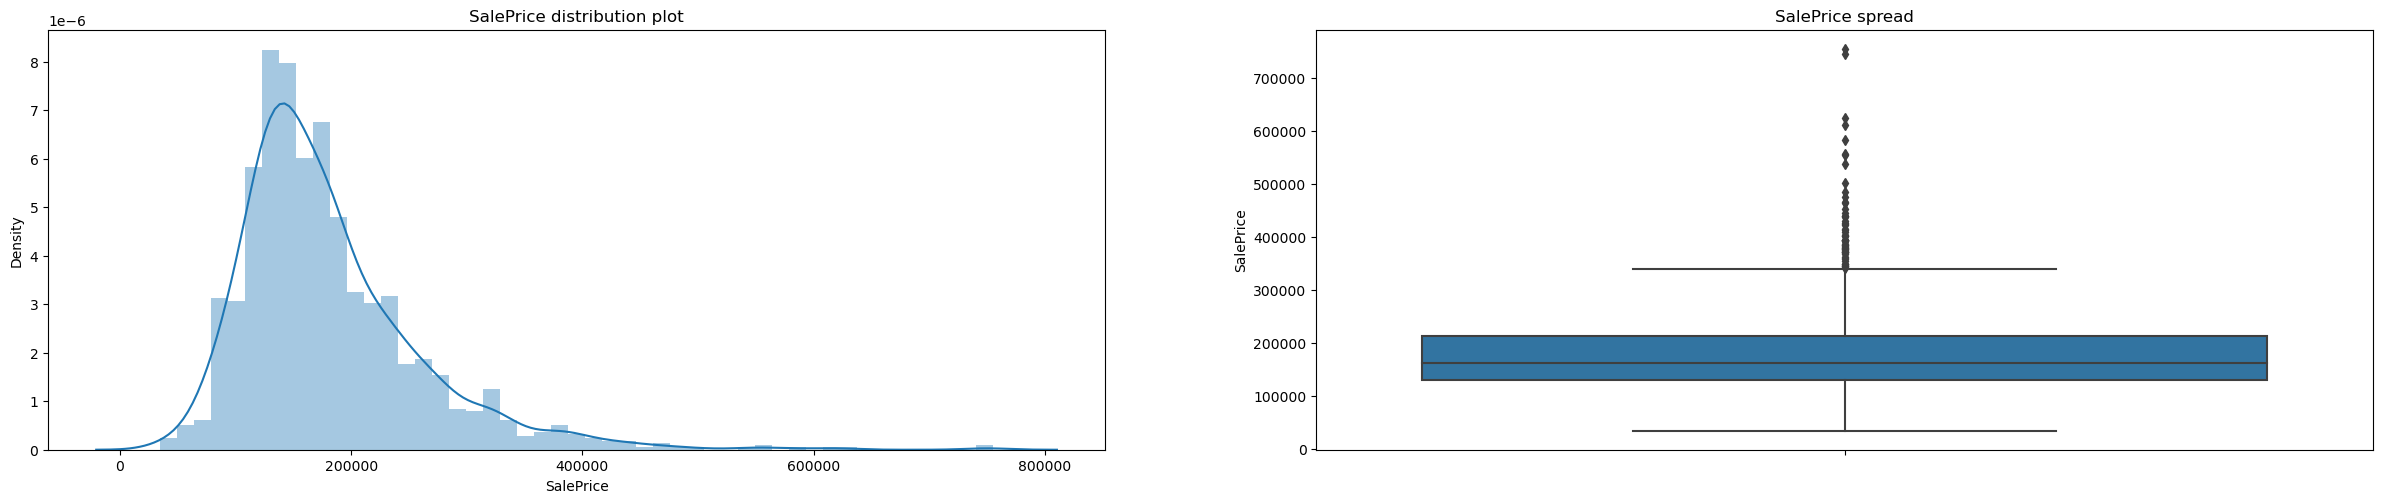

In [ ]:
# plot the distribution of SalePrice:
plt.figure(figsize=(30,12))

plt.subplot(2,2,1)
plt.title('SalePrice distribution plot')
sns.distplot(df.SalePrice)

plt.subplot(2,2,2)
plt.title('SalePrice spread')
sns.boxplot(y=df.SalePrice)
plt.show()

# 4. Pre-processing categorical features using one-hot encoding (OHE):

In [ ]:
One common method of pre-processing categorical features is to use a one-hot encoding (OHE).

Suppose that we start with a categorical feature xj
, taking three possible values: xj ∈ {R,G,B}. A
one-hot encoding of this feature replaces xj with three new features: xj R,xjG ,xj B . Each feature
contains a binary value of 0 or 1, depending on the value taken by xj
. For example, if xj = G, then
xjG = 1 and xj R = xj B = 0.
Give some examples of features that you think should use a one-hot encoding and explain why.
Convert at least one feature to a one-hot encoding (you can use your own implementation, or that
in pandas or scikit-learn) and visualize the results by plotting feature histograms of the original
feature and its new one-hot encoding

SyntaxError: invalid syntax (3289917692.py, line 1)

One-hot encoding is commonly used for categorical features that do not have a natural ordinal relationship between its values. Examples of such features are: Street, LandSlope, HouseStyle, BldgType, RoofStyle etc.


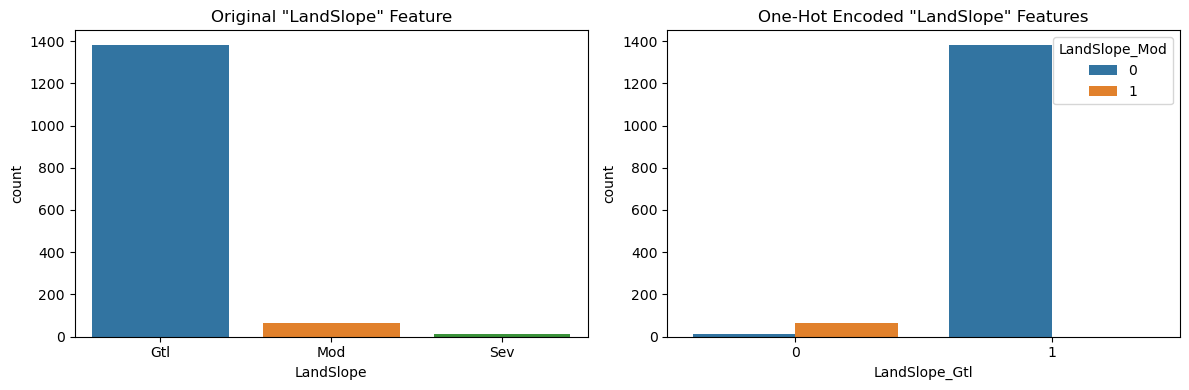

In [ ]:
# Perform one-hot encoding on the LandSlope feature
df_encoded = pd.get_dummies(df, columns=['LandSlope'])

# Visualize the original feature
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='LandSlope')
plt.title('Original "LandSlope" Feature')

# Visualize the one-hot encoded features
plt.subplot(1, 2, 2)
sns.countplot(data=df_encoded, x='LandSlope_Gtl', hue='LandSlope_Mod')
plt.title('One-Hot Encoded "LandSlope" Features')

plt.tight_layout()
plt.show()

## OLS:

Using ordinary least squares (OLS), try to predict house prices on this dataset. Choose the features(or combinations of features) you would like to use or ignore, provided you justify your choice.
Evaluate your predictions on the training set using the MSE and the R2
score. For this question, you need to implement OLS from scratch without using any external libraries or packages.